In [1]:
#1. Import necessary libraries and dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Import dataset and display first 5 rows
df = pd.read_csv('tvmarketing.csv')
print("First 5 rows:")
print(df.head())

First 5 rows:
      TV  Sales
0  230.1   22.1
1   44.5   10.4
2   17.2    9.3
3  151.5   18.5
4  180.8   12.9


In [2]:

# 2. Check column data types
print("\nData types:")
print(df.dtypes)

# 3. Check the shape of the Data Frame (rows, columns)
print("\nDataFrame shape:", df.shape)


Data types:
TV       float64
Sales    float64
dtype: object

DataFrame shape: (200, 2)



Summary statistics:
               TV       Sales
count  200.000000  200.000000
mean   147.042500   14.022500
std     85.854236    5.217457
min      0.700000    1.600000
25%     74.375000   10.375000
50%    149.750000   12.900000
75%    218.825000   17.400000
max    296.400000   27.000000


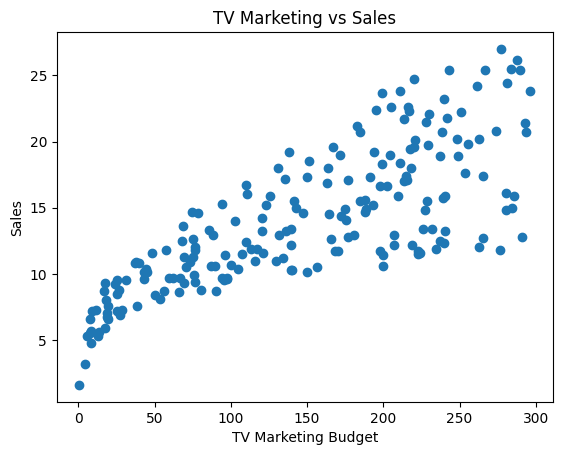

In [3]:
#


# 4. Look at summary statistics
print("\nSummary statistics:")
print(df.describe())

# 5. Visualize the relationship between the features and the dependent variable
plt.scatter(df['TV'], df['Sales'])
plt.title('TV Marketing vs Sales')
plt.xlabel('TV Marketing Budget')
plt.ylabel('Sales')
plt.show()

In [4]:
#4. Prepare data and split into train/test sets


# 6. Prepare X (feature variables) and y (response variable)
X = df['TV'].values.reshape(-1, 1)
y = df['Sales'].values

# 7. Split Data into Training and Testing Sets (70%-Train 30%-Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 8. Print the shape of train data and test data
print("\nTraining data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)


Training data shape: (140, 1) (140,)
Testing data shape: (60, 1) (60,)


In [5]:
#5. Implement Linear Regression from scratch

# 9. Perform Linear Regression (on train data) without using any library
def linear_regression(X, y):
    n = len(X)
    X_mean = np.mean(X)
    y_mean = np.mean(y)
    
    numerator = 0
    denominator = 0
    
    for i in range(n):
        numerator += (X[i] - X_mean) * (y[i] - y_mean)
        denominator += (X[i] - X_mean) ** 2
    
    b1 = numerator / denominator
    b0 = y_mean - (b1 * X_mean)
    
    return b0, b1

# Calculate coefficients
b0, b1 = linear_regression(X_train.ravel(), y_train)
print("\nManual Regression Coefficients:")
print("Intercept (b0):", b0)
print("Slope (b1):", b1)

# 10. Create the model using the calculated coefficients and make predictions
y_pred_manual = b0 + b1 * X_test.ravel()



Manual Regression Coefficients:
Intercept (b0): 7.23945983075114
Slope (b1): 0.04640780212815275


In [6]:
#6. Implement Linear Regression using scikit-learn

# 11. Perform Linear Regression using library(sklearn)
model = LinearRegression()
model.fit(X_train, y_train)

# 12. Print the intercept and coefficients
print("\nSklearn Regression Coefficients:")
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])

# 13. Make predictions on the testing set
y_pred = model.predict(X_test)


Sklearn Regression Coefficients:
Intercept: 7.239459830751138
Coefficient: 0.046407802128152764


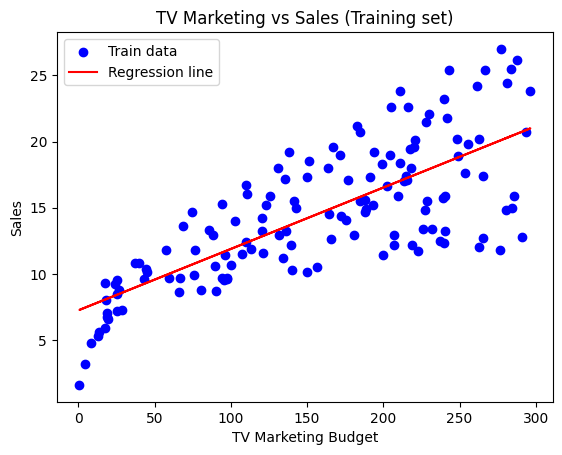

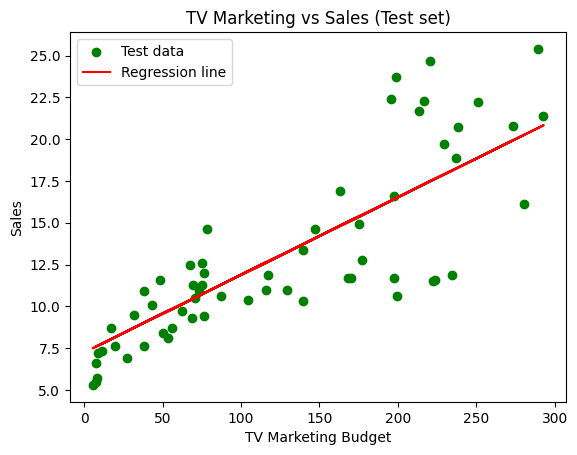

In [7]:
# 7. Visualization of results

# 14. Plot train data and the model
plt.scatter(X_train, y_train, color='blue', label='Train data')
plt.plot(X_train, model.predict(X_train), color='red', label='Regression line')
plt.title('TV Marketing vs Sales (Training set)')
plt.xlabel('TV Marketing Budget')
plt.ylabel('Sales')
plt.legend()
plt.show()

# 15. Plot test data and the model
plt.scatter(X_test, y_test, color='green', label='Test data')
plt.plot(X_test, y_pred, color='red', label='Regression line')
plt.title('TV Marketing vs Sales (Test set)')
plt.xlabel('TV Marketing Budget')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [8]:
# 8. Model evaluation

# 16. Print Mean Squared Error and R Squared Value
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nModel Evaluation:")
print("Mean Squared Error:", mse)
print("R Squared Value:", r2)

# 17. Calculate and print R Squared and Adjusted R Squared values without any library
def calculate_r2(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

def calculate_adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Calculate manually
ss_res = np.sum((y_test - y_pred_manual) ** 2)
ss_tot = np.sum((y_test - np.mean(y_test)) ** 2)
r2_manual = 1 - (ss_res / ss_tot)
n = len(y_test)  # number of samples
p = 1  # number of predictors
adjusted_r2 = calculate_adjusted_r2(r2_manual, n, p)

print("\nManual Calculations:")
print("R Squared:", r2_manual)
print("Adjusted R Squared:", adjusted_r2)


Model Evaluation:
Mean Squared Error: 8.970991242413614
R Squared Value: 0.6714477229302764

Manual Calculations:
R Squared: 0.6714477229302764
Adjusted R Squared: 0.6657830284980398
